<center>
    <h2>DATA COLLECTION </h2>
</center>



In [2]:
#Gọi các thư viện sử dụng:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Đọc tập dữ liệu Sales Dataset
df_sale = pd.read_feather('Data/Sales_data.ftr')
df_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [4]:
df_sale.info

<bound method DataFrame.info of        Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
1          None                        None             None       None   
2        176559  Bose SoundSport Headphones                1      99.99   
3        176560                Google Phone                1        600   
4        176560            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186845   259353      AAA Batteries (4-pack)                3       2.99   
186846   259354                      iPhone                1        700   
186847   259355                      iPhone                1        700   
186848   259356      34in Ultrawide Monitor                1     379.99   
186849   259357        USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address  
0

---
**Mô tả tập dữ liệu thu thập được phục vụ bài toán:**
-Tập dữ liệu được hiển thị trong hình chứa thông tin về các đơn hàng, có tổng cộng 186,850 hàng và 6 cột, cụ thể như sau:
- Order ID: Mã định danh duy nhất cho từng đơn hàng.
- Product: Tên sản phẩm được đặt hàng.
- Quantity Ordered: Số lượng sản phẩm được đặt hàng.
- Price Each: Giá của mỗi sản phẩm.
- Order Date: Ngày và thời gian đặt hàng.
- Purchase Address: Địa chỉ nơi đặt hàng.

---

In [6]:
#Hiển thị 5 giá trị đầu của data
df_sale.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
#Hiển thị 5 giá trị cuối của data
df_sale.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


<center>
    <h2>DATA PREPARATION </h2>
</center>



### 2.1) Quan sát và khám phá tập dữ liệu


In [10]:
#Các thuộc tính SỐ
df_sale.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Product                         355
Name: count, dtype: int64


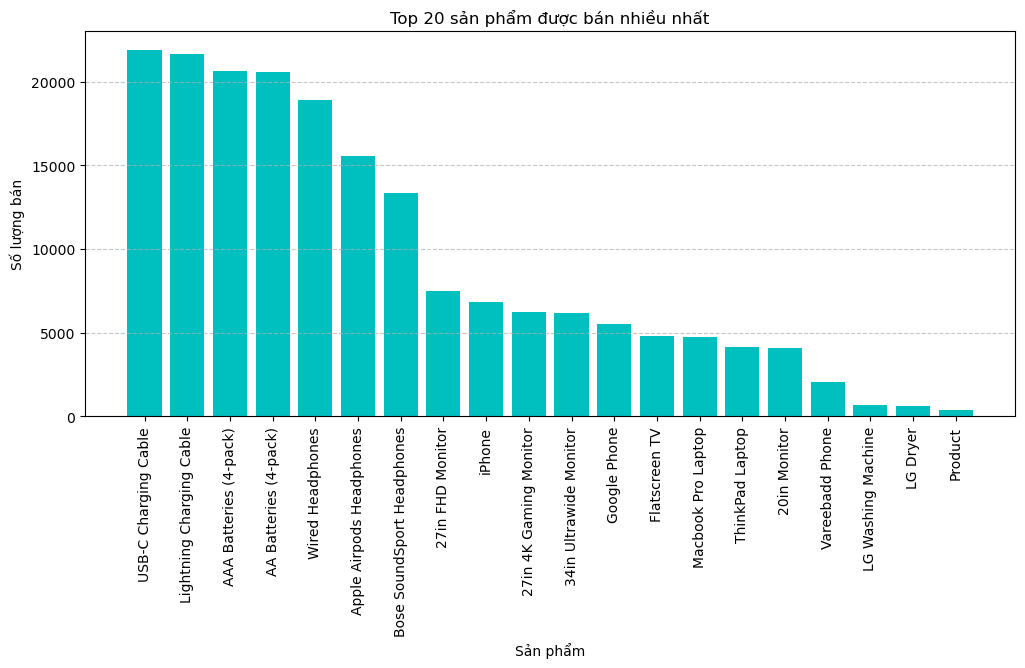

In [11]:
# Đếm số lượng từng sản phẩm
kq = df_sale['Product'].value_counts()
print(kq)
# Tạo figure và vẽ biểu đồ
fig = plt.figure(figsize=(12, 5))
plt.bar(kq.index[:20], kq.values[:20], color='c')  # Chỉ lấy 20 sản phẩm đầu
plt.xticks(rotation=90)  # Xoay tên sản phẩm để dễ đọc
plt.title('Top 20 sản phẩm được bán nhiều nhất')
plt.xlabel('Sản phẩm')
plt.ylabel('Số lượng bán')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.show()


### 2.2) Phát hiện và xử lý dữ liệu thiếu trong Dataset


#### 2.2.1) Xóa các dữ liệu trùng lặp

In [14]:
#Kiểm tra dữ liệu trùng lặp
df_sale.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 186850, dtype: bool

In [15]:
#Tổngg số dữ liệu trùng 
df_sale.duplicated().sum()

1162

In [16]:
#Hiển thị các dữ liệu trùng lặp
df_sale[df_sale.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
356,None,None,None,None,None,None
735,None,None,None,None,None,None
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"
186785,259297,Lightning Charging Cable,1,14.95,09/15/19 18:54,"138 Main St, Boston, MA 02215"


In [17]:
#Xóa dữ liệu trùng lặp:
df_sale = df_sale.drop_duplicates()

In [18]:
#lấy kích thước (số hàng, số cột) 
df_sale.shape

(185688, 6)

#### 2.2.2) Xóa các dữ liệu có giá trị Null, NaN

In [20]:
#Kiểm tra dữ liệu thiếu trong Dataset
df_sale.isnull().sum()

Order ID            1
Product             1
Quantity Ordered    1
Price Each          1
Order Date          1
Purchase Address    1
dtype: int64

In [21]:
df_sale[df_sale.duplicated()]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [22]:
# Tìm dòng chứa giá trị 
df_sale[df_sale.apply(lambda row: all(row == ["Order ID", "Product", "Quantity Ordered", "Price Each", "Order Date", "Purchase Address"]), axis=1)]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [23]:
df_sale = df_sale[df_sale["Order ID"] != "Order ID"]
df_sale.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [24]:
df_sale = df_sale.dropna()
df_sale.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [25]:
# Chuyển đổi thành kiểu datetime
# Cắt phần ngày và bỏ phần giờ
df_sale['Order Date'] = df_sale['Order Date'].str.split(' ').str[0]
df_sale['Order Date'] = pd.to_datetime(df_sale['Order Date'], format='%m/%d/%y')


# Sắp xếp tăng dần
df_sale = df_sale.sort_values(by="Order Date", ascending=True) 


In [26]:
df_sale.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
70630,144159,AA Batteries (4-pack),1,3.84,2019-01-01,"269 Main St, Atlanta, GA 30301"
71311,144804,Wired Headphones,1,11.99,2019-01-01,"628 Lake St, New York City, NY 10001"
73627,147019,Bose SoundSport Headphones,1,99.99,2019-01-01,"560 Forest St, New York City, NY 10001"
68826,142451,AAA Batteries (4-pack),1,2.99,2019-01-01,"232 12th St, Boston, MA 02215"
71806,145270,Google Phone,1,600,2019-01-01,"392 4th St, Dallas, TX 75001"


In [27]:
# Kiểm tra kiểu dữ liệu của cột Quantity Ordered và Price Each
df_sale[["Quantity Ordered", "Price Each"]].dtypes


Quantity Ordered    object
Price Each          object
dtype: object

In [28]:
# Chuyển đổi kiểu dữ liệu của cột Quantity Ordered và Price Each
df_sale["Quantity Ordered"] = pd.to_numeric(df_sale["Quantity Ordered"], errors="coerce")
df_sale["Price Each"] = pd.to_numeric(df_sale["Price Each"], errors="coerce")

# Kiểm tra lại kiểu dữ liệu sau khi chuyển đổi
df_sale[["Quantity Ordered", "Price Each"]].dtypes


Quantity Ordered      int64
Price Each          float64
dtype: object

<center>
    <h2> TRỰC QUAN HÓA DỮ LIỆU </h2>
</center>


In [30]:
# Chuyển đổi cột 'Order Date' sang định dạng datetime
df_sale['Order Date'] = pd.to_datetime(df_sale['Order Date'])

# Tạo các cột thời gian mới (đặc trưng thời gian)
df_sale['Order Year'] = df_sale['Order Date'].dt.year
df_sale['Order Month'] = df_sale['Order Date'].dt.month
df_sale['Order Day'] = df_sale['Order Date'].dt.day
df_sale['Order DayOfWeek'] = df_sale['Order Date'].dt.dayofweek # Thứ trong tuần (0=Thứ 2, 6=Chủ Nhật)
df_sale['Order Hour'] = df_sale['Order Date'].dt.hour

# Tạo cột tổng giá bán cho mỗi dòng giao dịch
df_sale['Total Sales'] = df_sale['Quantity Ordered'] * df_sale['Price Each']

print("\n5 dòng đầu tiên sau khi trích xuất thông tin thời gian và tính Total Sales:")
print(df_sale.head())
print("\nThông tin dữ liệu sau khi thêm cột thời gian:")
print(df_sale.info())


5 dòng đầu tiên sau khi trích xuất thông tin thời gian và tính Total Sales:
      Order ID                     Product  Quantity Ordered  Price Each  \
70630   144159       AA Batteries (4-pack)                 1        3.84   
71311   144804            Wired Headphones                 1       11.99   
73627   147019  Bose SoundSport Headphones                 1       99.99   
68826   142451      AAA Batteries (4-pack)                 1        2.99   
71806   145270                Google Phone                 1      600.00   

      Order Date                        Purchase Address  Order Year  \
70630 2019-01-01          269 Main St, Atlanta, GA 30301        2019   
71311 2019-01-01    628 Lake St, New York City, NY 10001        2019   
73627 2019-01-01  560 Forest St, New York City, NY 10001        2019   
68826 2019-01-01           232 12th St, Boston, MA 02215        2019   
71806 2019-01-01            392 4th St, Dallas, TX 75001        2019   

       Order Month  Order Day  Or

In [31]:
# Tổng hợp nhu cầu hàng ngày cho từng sản phẩm
daily_product_demand = df_sale.groupby([
    df_sale['Order Date'].dt.date, # Chỉ lấy ngày
    'Product'
])['Quantity Ordered'].sum().reset_index()

# Đổi tên cột ngày để dễ làm việc
daily_product_demand.rename(columns={'Order Date': 'Date', 'Quantity Ordered': 'Daily Demand'}, inplace=True)

# Chuyển đổi cột 'Date' về định dạng datetime
daily_product_demand['Date'] = pd.to_datetime(daily_product_demand['Date'])

print("\n5 dòng đầu tiên của dữ liệu nhu cầu sản phẩm hàng ngày:")
print(daily_product_demand.head())
print("\nSố lượng sản phẩm duy nhất trong tập dữ liệu:")
print(daily_product_demand['Product'].nunique())
print("\nPhạm vi ngày trong tập dữ liệu nhu cầu:")
print(f"Từ: {daily_product_demand['Date'].min()} đến: {daily_product_demand['Date'].max()}")


5 dòng đầu tiên của dữ liệu nhu cầu sản phẩm hàng ngày:
        Date                 Product  Daily Demand
0 2019-01-01            20in Monitor             4
1 2019-01-01  27in 4K Gaming Monitor             7
2 2019-01-01        27in FHD Monitor             8
3 2019-01-01  34in Ultrawide Monitor            18
4 2019-01-01   AA Batteries (4-pack)            33

Số lượng sản phẩm duy nhất trong tập dữ liệu:
19

Phạm vi ngày trong tập dữ liệu nhu cầu:
Từ: 2019-01-01 00:00:00 đến: 2020-01-01 00:00:00


In [32]:
# Tạo một DataFrame chứa tất cả các ngày trong phạm vi dữ liệu
all_dates = pd.date_range(start=daily_product_demand['Date'].min(),
                          end=daily_product_demand['Date'].max(),
                          freq='D') # 'D' cho Daily (hàng ngày)

# Lấy danh sách tất cả các sản phẩm duy nhất
all_products = daily_product_demand['Product'].unique()

# Tạo một DataFrame trống với tất cả các kết hợp Date và Product
from itertools import product
full_index = pd.MultiIndex.from_product([all_dates, all_products], names=['Date', 'Product'])
full_demand_df = pd.DataFrame(index=full_index).reset_index()

# Ghép (merge) dữ liệu nhu cầu đã tổng hợp vào DataFrame đầy đủ
# outer merge để giữ lại tất cả các ngày và sản phẩm
final_demand_df = pd.merge(full_demand_df, daily_product_demand,
                           on=['Date', 'Product'],
                           how='left')

# Điền giá trị NaN (khi không có đơn hàng) bằng 0
final_demand_df['Daily Demand'] = final_demand_df['Daily Demand'].fillna(0)

# Sắp xếp dữ liệu theo sản phẩm và ngày để chuẩn bị cho chuỗi thời gian
final_demand_df.sort_values(by=['Product', 'Date'], inplace=True)
final_demand_df.reset_index(drop=True, inplace=True)

print("\n5 dòng đầu tiên của dữ liệu nhu cầu sau khi điền đầy đủ chuỗi thời gian (Daily Demand = 0 cho ngày không có đơn):")
print(final_demand_df.head())
print("\nKiểm tra một sản phẩm cụ thể để xem chuỗi thời gian đầy đủ:")
# Chọn một sản phẩm bất kỳ để kiểm tra
sample_product = final_demand_df['Product'].sample(1).iloc[0]
print(f"\nNhu cầu của sản phẩm '{sample_product}' trong 10 ngày đầu tiên (kể cả 0):")
print(final_demand_df[final_demand_df['Product'] == sample_product].head(10))


5 dòng đầu tiên của dữ liệu nhu cầu sau khi điền đầy đủ chuỗi thời gian (Daily Demand = 0 cho ngày không có đơn):
        Date       Product  Daily Demand
0 2019-01-01  20in Monitor           4.0
1 2019-01-02  20in Monitor           9.0
2 2019-01-03  20in Monitor           6.0
3 2019-01-04  20in Monitor           7.0
4 2019-01-05  20in Monitor           5.0

Kiểm tra một sản phẩm cụ thể để xem chuỗi thời gian đầy đủ:

Nhu cầu của sản phẩm 'Flatscreen TV' trong 10 ngày đầu tiên (kể cả 0):
           Date        Product  Daily Demand
2928 2019-01-01  Flatscreen TV           9.0
2929 2019-01-02  Flatscreen TV           9.0
2930 2019-01-03  Flatscreen TV           5.0
2931 2019-01-04  Flatscreen TV          10.0
2932 2019-01-05  Flatscreen TV           5.0
2933 2019-01-06  Flatscreen TV           5.0
2934 2019-01-07  Flatscreen TV           6.0
2935 2019-01-08  Flatscreen TV           3.0
2936 2019-01-09  Flatscreen TV           7.0
2937 2019-01-10  Flatscreen TV           6.0


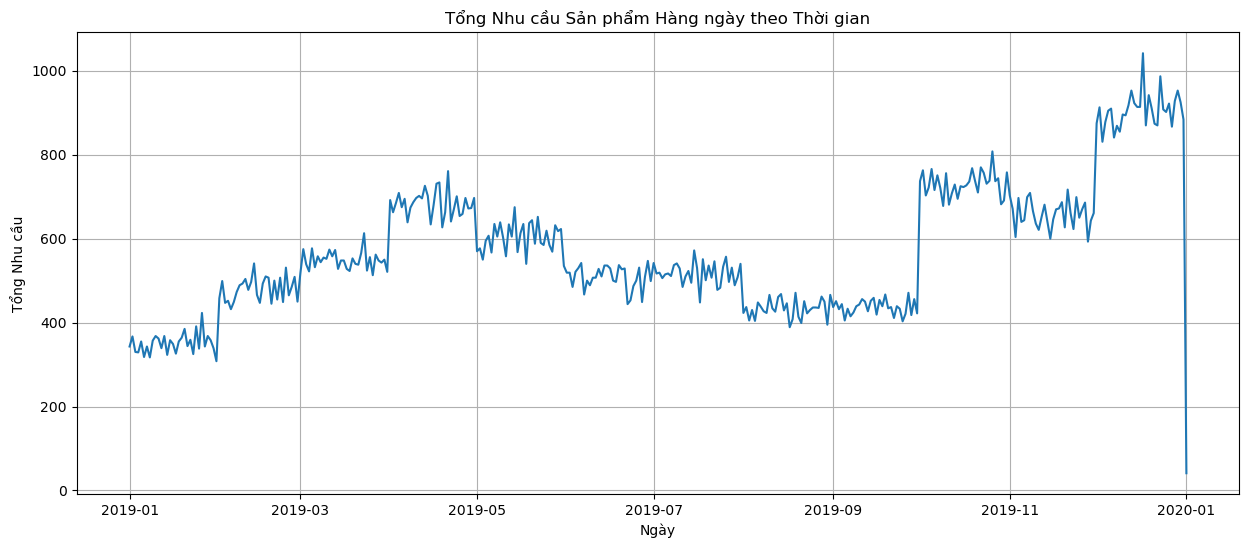

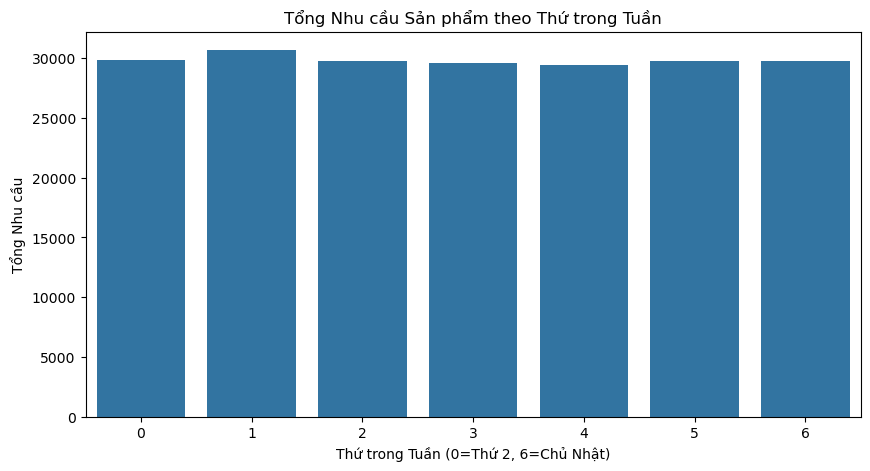

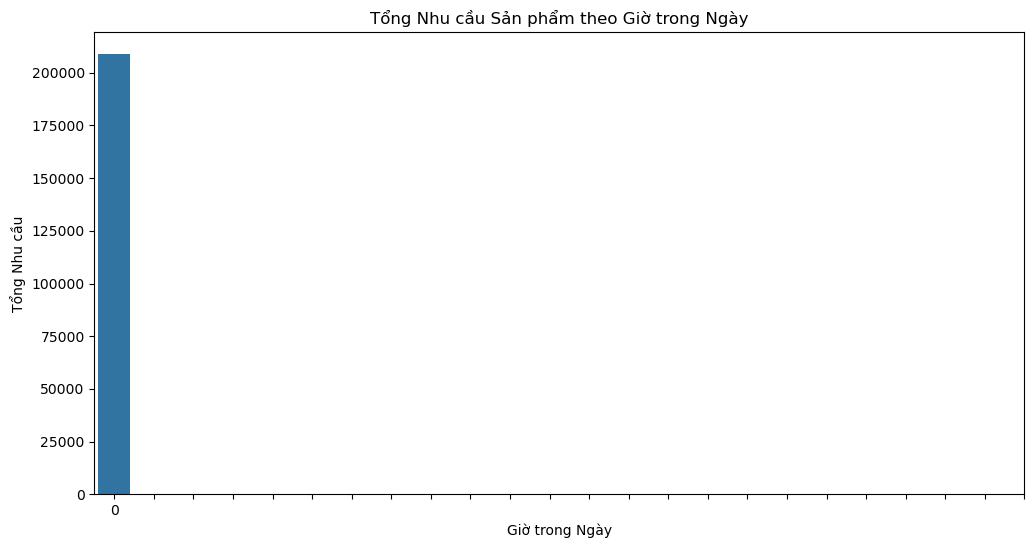

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tổng hợp nhu cầu hàng ngày của TẤT CẢ các sản phẩm
overall_daily_demand = final_demand_df.groupby('Date')['Daily Demand'].sum().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(data=overall_daily_demand, x='Date', y='Daily Demand')
plt.title('Tổng Nhu cầu Sản phẩm Hàng ngày theo Thời gian')
plt.xlabel('Ngày')
plt.ylabel('Tổng Nhu cầu')
plt.grid(True)
plt.show()

# Trực quan hóa trung bình nhu cầu theo Thứ trong tuần
overall_daily_demand['DayOfWeek'] = overall_daily_demand['Date'].dt.dayofweek
plt.figure(figsize=(10, 5))
sns.barplot(data=overall_daily_demand, x='DayOfWeek', y='Daily Demand', estimator=sum, errorbar=None)
plt.title('Tổng Nhu cầu Sản phẩm theo Thứ trong Tuần')
plt.xlabel('Thứ trong Tuần (0=Thứ 2, 6=Chủ Nhật)')
plt.ylabel('Tổng Nhu cầu')
plt.show()

# Trực quan hóa trung bình nhu cầu theo Giờ trong ngày
df_sale['Order Hour'] = df_sale['Order Date'].dt.hour
demand_by_hour = df_sale.groupby('Order Hour')['Quantity Ordered'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=demand_by_hour, x='Order Hour', y='Quantity Ordered', estimator=sum, errorbar=None)
plt.title('Tổng Nhu cầu Sản phẩm theo Giờ trong Ngày')
plt.xlabel('Giờ trong Ngày')
plt.ylabel('Tổng Nhu cầu')
plt.xticks(range(0, 24))
plt.show()

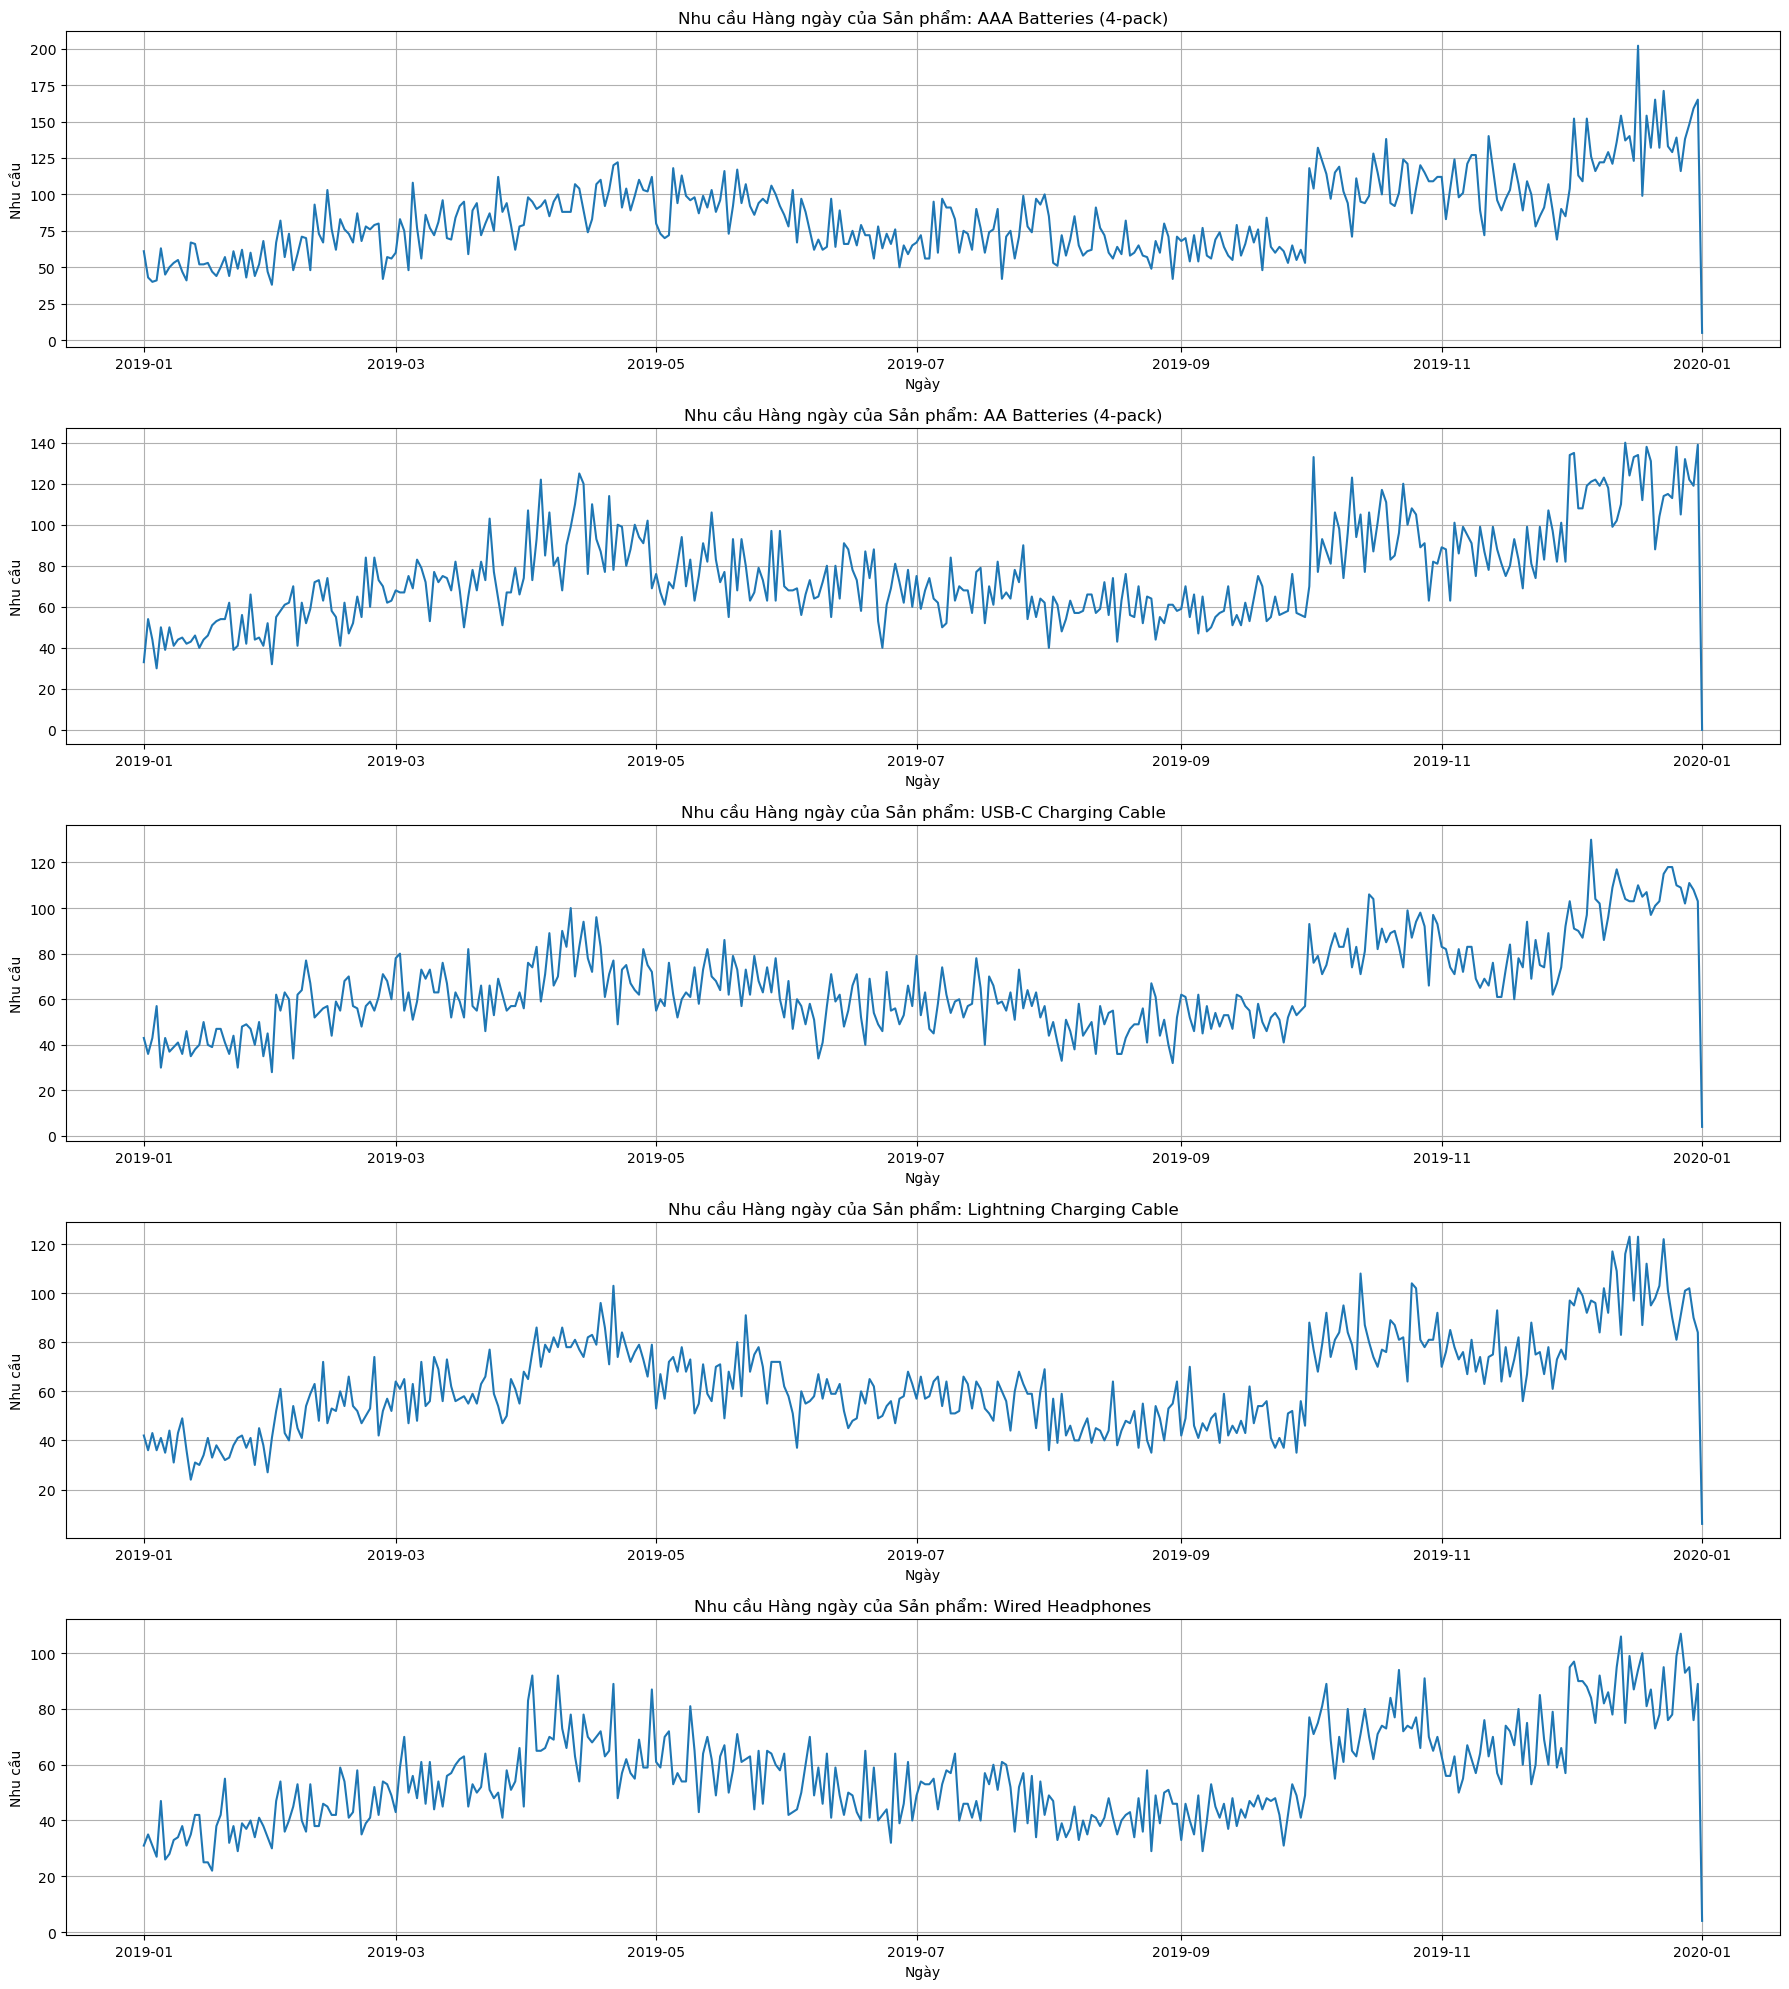

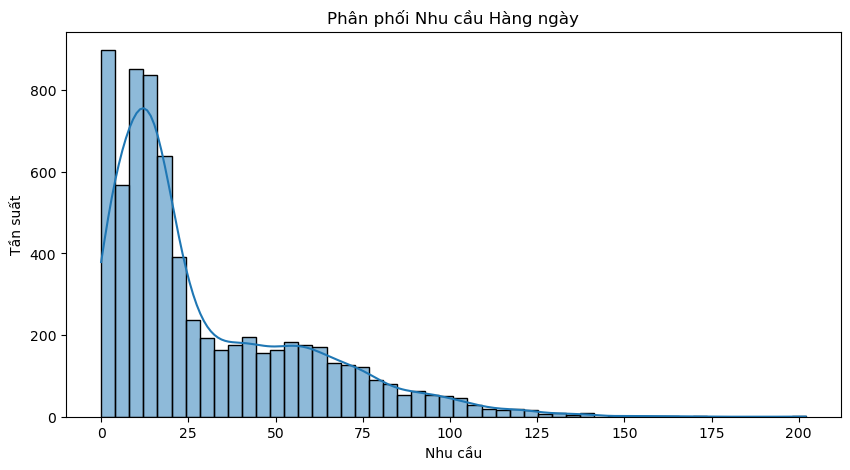

In [34]:
# Chọn một vài sản phẩm ngẫu nhiên để trực quan hóa
# Hoặc bạn có thể chọn các sản phẩm bán chạy nhất/ít chạy nhất
unique_products = final_demand_df['Product'].unique()
num_products_to_plot = min(5, len(unique_products)) # Trực quan hóa tối đa 5 sản phẩm

# Lấy 5 sản phẩm có tổng nhu cầu cao nhất để dễ thấy xu hướng
top_5_products = final_demand_df.groupby('Product')['Daily Demand'].sum().nlargest(num_products_to_plot).index.tolist()

plt.figure(figsize=(18, num_products_to_plot * 4)) # Tăng chiều cao để mỗi plot dễ nhìn hơn
for i, product_name in enumerate(top_5_products):
    plt.subplot(num_products_to_plot, 1, i + 1)
    product_data = final_demand_df[final_demand_df['Product'] == product_name].copy()
    sns.lineplot(data=product_data, x='Date', y='Daily Demand')
    plt.title(f'Nhu cầu Hàng ngày của Sản phẩm: {product_name}')
    plt.xlabel('Ngày')
    plt.ylabel('Nhu cầu')
    plt.grid(True)
plt.tight_layout() # Điều chỉnh layout để tránh chồng lấn
plt.show()

# Trực quan hóa phân phối của nhu cầu hàng ngày
plt.figure(figsize=(10, 5))
sns.histplot(final_demand_df['Daily Demand'], bins=50, kde=True)
plt.title('Phân phối Nhu cầu Hàng ngày')
plt.xlabel('Nhu cầu')
plt.ylabel('Tần suất')
plt.show()

In [35]:
# Tạo lại các đặc trưng thời gian trong final_demand_df
# df.dt.is_month_start, df.dt.is_month_end có thể hữu ích cho các chiến dịch cuối/đầu tháng
final_demand_df['Year'] = final_demand_df['Date'].dt.year
final_demand_df['Month'] = final_demand_df['Date'].dt.month
final_demand_df['Day'] = final_demand_df['Date'].dt.day
final_demand_df['DayOfWeek'] = final_demand_df['Date'].dt.dayofweek # 0=Thứ 2, 6=Chủ Nhật
final_demand_df['DayOfYear'] = final_demand_df['Date'].dt.dayofyear # Ngày thứ bao nhiêu trong năm (1-366)
final_demand_df['WeekOfYear'] = final_demand_df['Date'].dt.isocalendar().week.astype(int) # Tuần thứ bao nhiêu trong năm
final_demand_df['Quarter'] = final_demand_df['Date'].dt.quarter

# Đặc trưng có phải là cuối tuần không
final_demand_df['Is_Weekend'] = final_demand_df['DayOfWeek'].isin([5, 6]).astype(int)

# Gợi ý: Nếu bạn có dữ liệu về ngày lễ, bạn có thể tạo cột 'Is_Holiday' tại đây.
# Ví dụ: final_demand_df['Is_Holiday'] = final_demand_df['Date'].isin(list_of_holidays).astype(int)

print("\n5 dòng đầu tiên với các đặc trưng thời gian mới:")
print(final_demand_df.head())


5 dòng đầu tiên với các đặc trưng thời gian mới:
        Date       Product  Daily Demand  Year  Month  Day  DayOfWeek  \
0 2019-01-01  20in Monitor           4.0  2019      1    1          1   
1 2019-01-02  20in Monitor           9.0  2019      1    2          2   
2 2019-01-03  20in Monitor           6.0  2019      1    3          3   
3 2019-01-04  20in Monitor           7.0  2019      1    4          4   
4 2019-01-05  20in Monitor           5.0  2019      1    5          5   

   DayOfYear  WeekOfYear  Quarter  Is_Weekend  
0          1           1        1           0  
1          2           1        1           0  
2          3           1        1           0  
3          4           1        1           0  
4          5           1        1           1  


In [36]:
# Sắp xếp lại để đảm bảo đúng thứ tự khi tạo lag
final_demand_df.sort_values(by=['Product', 'Date'], inplace=True)

# Tạo đặc trưng nhu cầu trễ (lagged features)
# Nhu cầu của ngày hôm qua
final_demand_df['Demand_Lag_1'] = final_demand_df.groupby('Product')['Daily Demand'].shift(1)
# Nhu cầu của 7 ngày trước (để bắt tính mùa vụ tuần)
final_demand_df['Demand_Lag_7'] = final_demand_df.groupby('Product')['Daily Demand'].shift(7)
# Nhu cầu của 30 ngày trước (để bắt tính mùa vụ tháng/xu hướng)
final_demand_df['Demand_Lag_30'] = final_demand_df.groupby('Product')['Daily Demand'].shift(30)

# Xử lý các giá trị NaN sinh ra do shift (thường là ở đầu chuỗi mỗi sản phẩm)
# Có thể điền bằng 0 hoặc giá trị trung bình nếu phù hợp, hoặc đơn giản là để mô hình tự xử lý
# Với lag features, thường để NaN và các mô hình như XGBoost/LightGBM có thể tự xử lý
# Hoặc điền 0 nếu cho rằng không có nhu cầu trước đó.
final_demand_df['Demand_Lag_1'].fillna(0, inplace=True)
final_demand_df['Demand_Lag_7'].fillna(0, inplace=True)
final_demand_df['Demand_Lag_30'].fillna(0, inplace=True)


print("\n5 dòng đầu tiên với các đặc trưng trễ:")
print(final_demand_df.head())


5 dòng đầu tiên với các đặc trưng trễ:
        Date       Product  Daily Demand  Year  Month  Day  DayOfWeek  \
0 2019-01-01  20in Monitor           4.0  2019      1    1          1   
1 2019-01-02  20in Monitor           9.0  2019      1    2          2   
2 2019-01-03  20in Monitor           6.0  2019      1    3          3   
3 2019-01-04  20in Monitor           7.0  2019      1    4          4   
4 2019-01-05  20in Monitor           5.0  2019      1    5          5   

   DayOfYear  WeekOfYear  Quarter  Is_Weekend  Demand_Lag_1  Demand_Lag_7  \
0          1           1        1           0           0.0           0.0   
1          2           1        1           0           4.0           0.0   
2          3           1        1           0           9.0           0.0   
3          4           1        1           0           6.0           0.0   
4          5           1        1           1           7.0           0.0   

   Demand_Lag_30  
0            0.0  
1            0.0  
2

In [37]:
# Tạo đặc trưng trung bình động (Rolling Mean)
# Trung bình nhu cầu trong 7 ngày gần nhất
final_demand_df['Demand_Rolling_Mean_7'] = final_demand_df.groupby('Product')['Daily Demand'].transform(lambda x: x.rolling(window=7, min_periods=1).mean().shift(1))
# Trung bình nhu cầu trong 30 ngày gần nhất
final_demand_df['Demand_Rolling_Mean_30'] = final_demand_df.groupby('Product')['Daily Demand'].transform(lambda x: x.rolling(window=30, min_periods=1).mean().shift(1))

# Tương tự, có thể tạo độ lệch chuẩn (Rolling Std) để đo độ biến động
final_demand_df['Demand_Rolling_Std_7'] = final_demand_df.groupby('Product')['Daily Demand'].transform(lambda x: x.rolling(window=7, min_periods=1).std().shift(1))
final_demand_df['Demand_Rolling_Std_30'] = final_demand_df.groupby('Product')['Daily Demand'].transform(lambda x: x.rolling(window=30, min_periods=1).std().shift(1))


# Xử lý NaN do rolling (thường là ở đầu chuỗi mỗi sản phẩm)
final_demand_df.fillna(0, inplace=True) # Điền 0 cho tất cả NaN sau khi tạo rolling features

print("\n5 dòng đầu tiên với các đặc trưng trung bình động:")
print(final_demand_df.head())


5 dòng đầu tiên với các đặc trưng trung bình động:
        Date       Product  Daily Demand  Year  Month  Day  DayOfWeek  \
0 2019-01-01  20in Monitor           4.0  2019      1    1          1   
1 2019-01-02  20in Monitor           9.0  2019      1    2          2   
2 2019-01-03  20in Monitor           6.0  2019      1    3          3   
3 2019-01-04  20in Monitor           7.0  2019      1    4          4   
4 2019-01-05  20in Monitor           5.0  2019      1    5          5   

   DayOfYear  WeekOfYear  Quarter  Is_Weekend  Demand_Lag_1  Demand_Lag_7  \
0          1           1        1           0           0.0           0.0   
1          2           1        1           0           4.0           0.0   
2          3           1        1           0           9.0           0.0   
3          4           1        1           0           6.0           0.0   
4          5           1        1           1           7.0           0.0   

   Demand_Lag_30  Demand_Rolling_Mean_7  Deman

In [38]:
from sklearn.preprocessing import LabelEncoder

# Mã hóa cột 'Product' thành số
le = LabelEncoder()
final_demand_df['Product_Encoded'] = le.fit_transform(final_demand_df['Product'])

# (Tùy chọn) Nếu bạn muốn, có thể dùng One-Hot Encoding nếu số lượng sản phẩm không quá lớn
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# product_one_hot = pd.DataFrame(enc.fit_transform(final_demand_df[['Product']]),
#                                columns=enc.get_feature_names_out(['Product']))
# final_demand_df = pd.concat([final_demand_df, product_one_hot], axis=1)

print("\n5 dòng đầu tiên với 'Product_Encoded':")
print(final_demand_df.head())
print(f"\nSố lượng sản phẩm duy nhất: {len(le.classes_)}")


5 dòng đầu tiên với 'Product_Encoded':
        Date       Product  Daily Demand  Year  Month  Day  DayOfWeek  \
0 2019-01-01  20in Monitor           4.0  2019      1    1          1   
1 2019-01-02  20in Monitor           9.0  2019      1    2          2   
2 2019-01-03  20in Monitor           6.0  2019      1    3          3   
3 2019-01-04  20in Monitor           7.0  2019      1    4          4   
4 2019-01-05  20in Monitor           5.0  2019      1    5          5   

   DayOfYear  WeekOfYear  Quarter  Is_Weekend  Demand_Lag_1  Demand_Lag_7  \
0          1           1        1           0           0.0           0.0   
1          2           1        1           0           4.0           0.0   
2          3           1        1           0           9.0           0.0   
3          4           1        1           0           6.0           0.0   
4          5           1        1           1           7.0           0.0   

   Demand_Lag_30  Demand_Rolling_Mean_7  Demand_Rolling_Me


<center>
    <h2> ML Model Traning & Validation </h2>
</center>



In [40]:
# Đảm bảo final_demand_df đã có từ các bước trước
# Ví dụ: Chia 80% dữ liệu đầu tiên cho huấn luyện, 20% cuối cùng cho kiểm thử.
# Hoặc chọn một ngày cụ thể làm mốc chia.

# Phạm vi ngày của dữ liệu
min_date = final_demand_df['Date'].min()
max_date = final_demand_df['Date'].max()
print(f"Phạm vi dữ liệu: từ {min_date.date()} đến {max_date.date()}")

# Chúng ta sẽ chọn một mốc thời gian để chia dữ liệu.
# Ví dụ: Sử dụng 80% dữ liệu đầu tiên cho huấn luyện, 20% cuối cùng cho kiểm thử.
# Hoặc, một cách phổ biến hơn trong thực tế, là chọn một vài tuần/tháng cuối làm tập kiểm thử.

# Tìm ngày chia (ví dụ: chia tại 80% tổng số ngày)
split_date_index = int(len(final_demand_df['Date'].unique()) * 0.8)
split_date = sorted(final_demand_df['Date'].unique())[split_date_index]

print(f"\nNgày chia dữ liệu dự kiến: {split_date.date()}")

# Chia dữ liệu huấn luyện và kiểm thử
train_df = final_demand_df[final_demand_df['Date'] < split_date].copy()
test_df = final_demand_df[final_demand_df['Date'] >= split_date].copy()

print(f"Số lượng bản ghi trong tập huấn luyện: {len(train_df)}")
print(f"Số lượng bản ghi trong tập kiểm thử: {len(test_df)}")

# Xác định các đặc trưng (X) và biến mục tiêu (y)
# Các đặc trưng chúng ta đã tạo
features = [
    'Year', 'Month', 'Day', 'DayOfWeek', 'DayOfYear', 'WeekOfYear', 'Quarter', 'Is_Weekend',
    'Demand_Lag_1', 'Demand_Lag_7', 'Demand_Lag_30',
    'Demand_Rolling_Mean_7', 'Demand_Rolling_Mean_30',
    'Demand_Rolling_Std_7', 'Demand_Rolling_Std_30',
    'Product_Encoded' # Đặc trưng sản phẩm đã mã hóa
]
target = 'Daily Demand'

# Tạo X_train, y_train, X_test, y_test
X_train = train_df[features]
y_train = train_df[target]

X_test = test_df[features]
y_test = test_df[target]

print(f"\nKích thước X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Kích thước X_test: {X_test.shape}, y_test: {y_test.shape}")

Phạm vi dữ liệu: từ 2019-01-01 đến 2020-01-01

Ngày chia dữ liệu dự kiến: 2019-10-20
Số lượng bản ghi trong tập huấn luyện: 5548
Số lượng bản ghi trong tập kiểm thử: 1406

Kích thước X_train: (5548, 16), y_train: (5548,)
Kích thước X_test: (1406, 16), y_test: (1406,)


In [41]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Khởi tạo và huấn luyện mô hình
model = lgb.LGBMRegressor(random_state=42)
print("\nĐang huấn luyện mô hình LightGBM Regressor...")
model.fit(X_train, y_train)
print("Huấn luyện mô hình hoàn tất.")

# In các tham số (sau khi đã fit xong)
params = model.get_params()
for key, value in params.items():
    print(f"{key}: {value}")



Đang huấn luyện mô hình LightGBM Regressor...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1731
[LightGBM] [Info] Number of data points in the train set: 5548, number of used features: 15
[LightGBM] [Info] Start training from score 27.408796
Huấn luyện mô hình hoàn tất.
boosting_type: gbdt
class_weight: None
colsample_bytree: 1.0
importance_type: split
learning_rate: 0.1
max_depth: -1
min_child_samples: 20
min_child_weight: 0.001
min_split_gain: 0.0
n_estimators: 100
n_jobs: None
num_leaves: 31
objective: None
random_state: 42
reg_alpha: 0.0
reg_lambda: 0.0
subsample: 1.0
subsample_for_bin: 200000
subsample_freq: 0


In [42]:
# Thực hiện dự đoán trên tập kiểm thử
y_pred = model.predict(X_test)

# Đảm bảo các giá trị dự đoán không âm (nhu cầu không thể âm)
y_pred[y_pred < 0] = 0

# Tính toán các chỉ số đánh giá
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # RMSE là căn bậc hai của MSE

# Tính MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Thay thế các giá trị 0 trong y_test bằng một số rất nhỏ để tránh lỗi chia 0
y_test_non_zero = np.where(y_test == 0, 1e-10, y_test) # Dùng 1e-10 thay vì 0
mape_robust = np.mean(np.abs((y_test - y_pred) / y_test_non_zero)) * 100


print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_robust:.2f}%")

Mean Absolute Error (MAE): 7.61
Mean Squared Error (MSE): 149.38
Root Mean Squared Error (RMSE): 12.22
Mean Absolute Percentage Error (MAPE): 127140969970.22%


--- Ý nghĩa các chỉ số ---
MAE (7.61): Trung bình độ lớn sai số tuyệt đối giữa dự đoán và thực tế. Ví dụ, nếu MAE là 5, nghĩa là trung bình mô hình dự đoán lệch 5 đơn vị so với thực tế.
RMSE (12.22): Tương tự MAE nhưng nhạy cảm hơn với các sai số lớn. Cùng đơn vị với biến mục tiêu.
MAPE (127140969970.22%): Sai số trung bình dưới dạng phần trăm. Ví dụ, 15% nghĩa là mô hình dự đoán lệch trung bình 15% so với giá trị thực tế. Rất hữu ích cho các nhà quản lý.

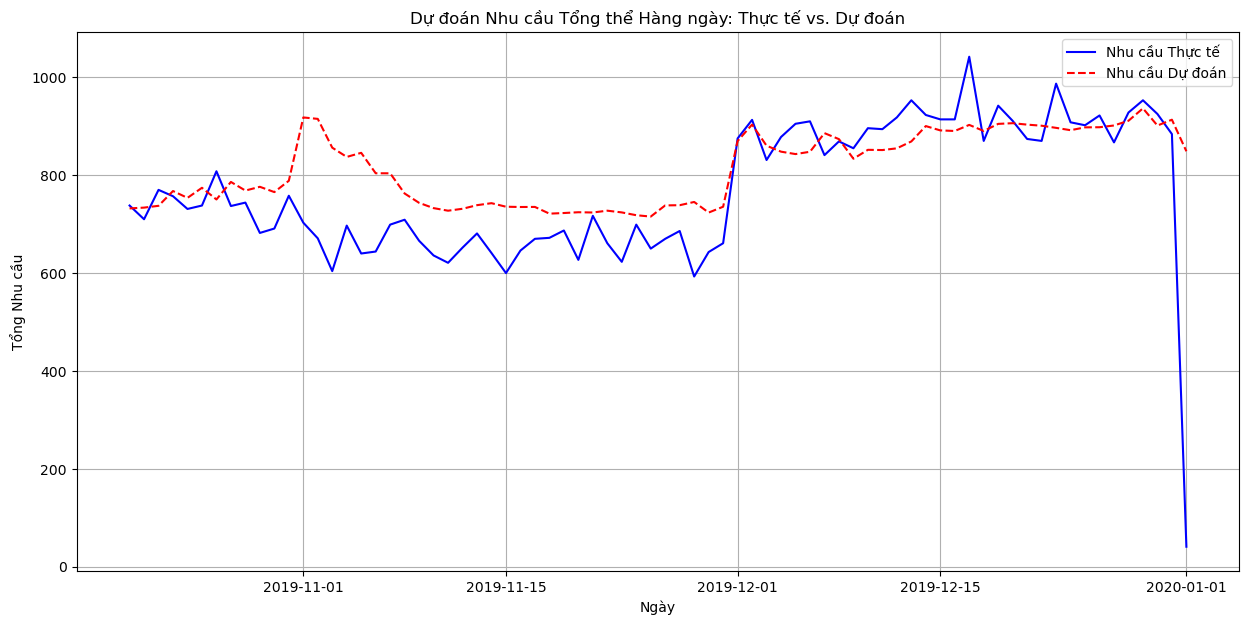


--- Trực quan hóa kết quả cho một vài sản phẩm cụ thể ---


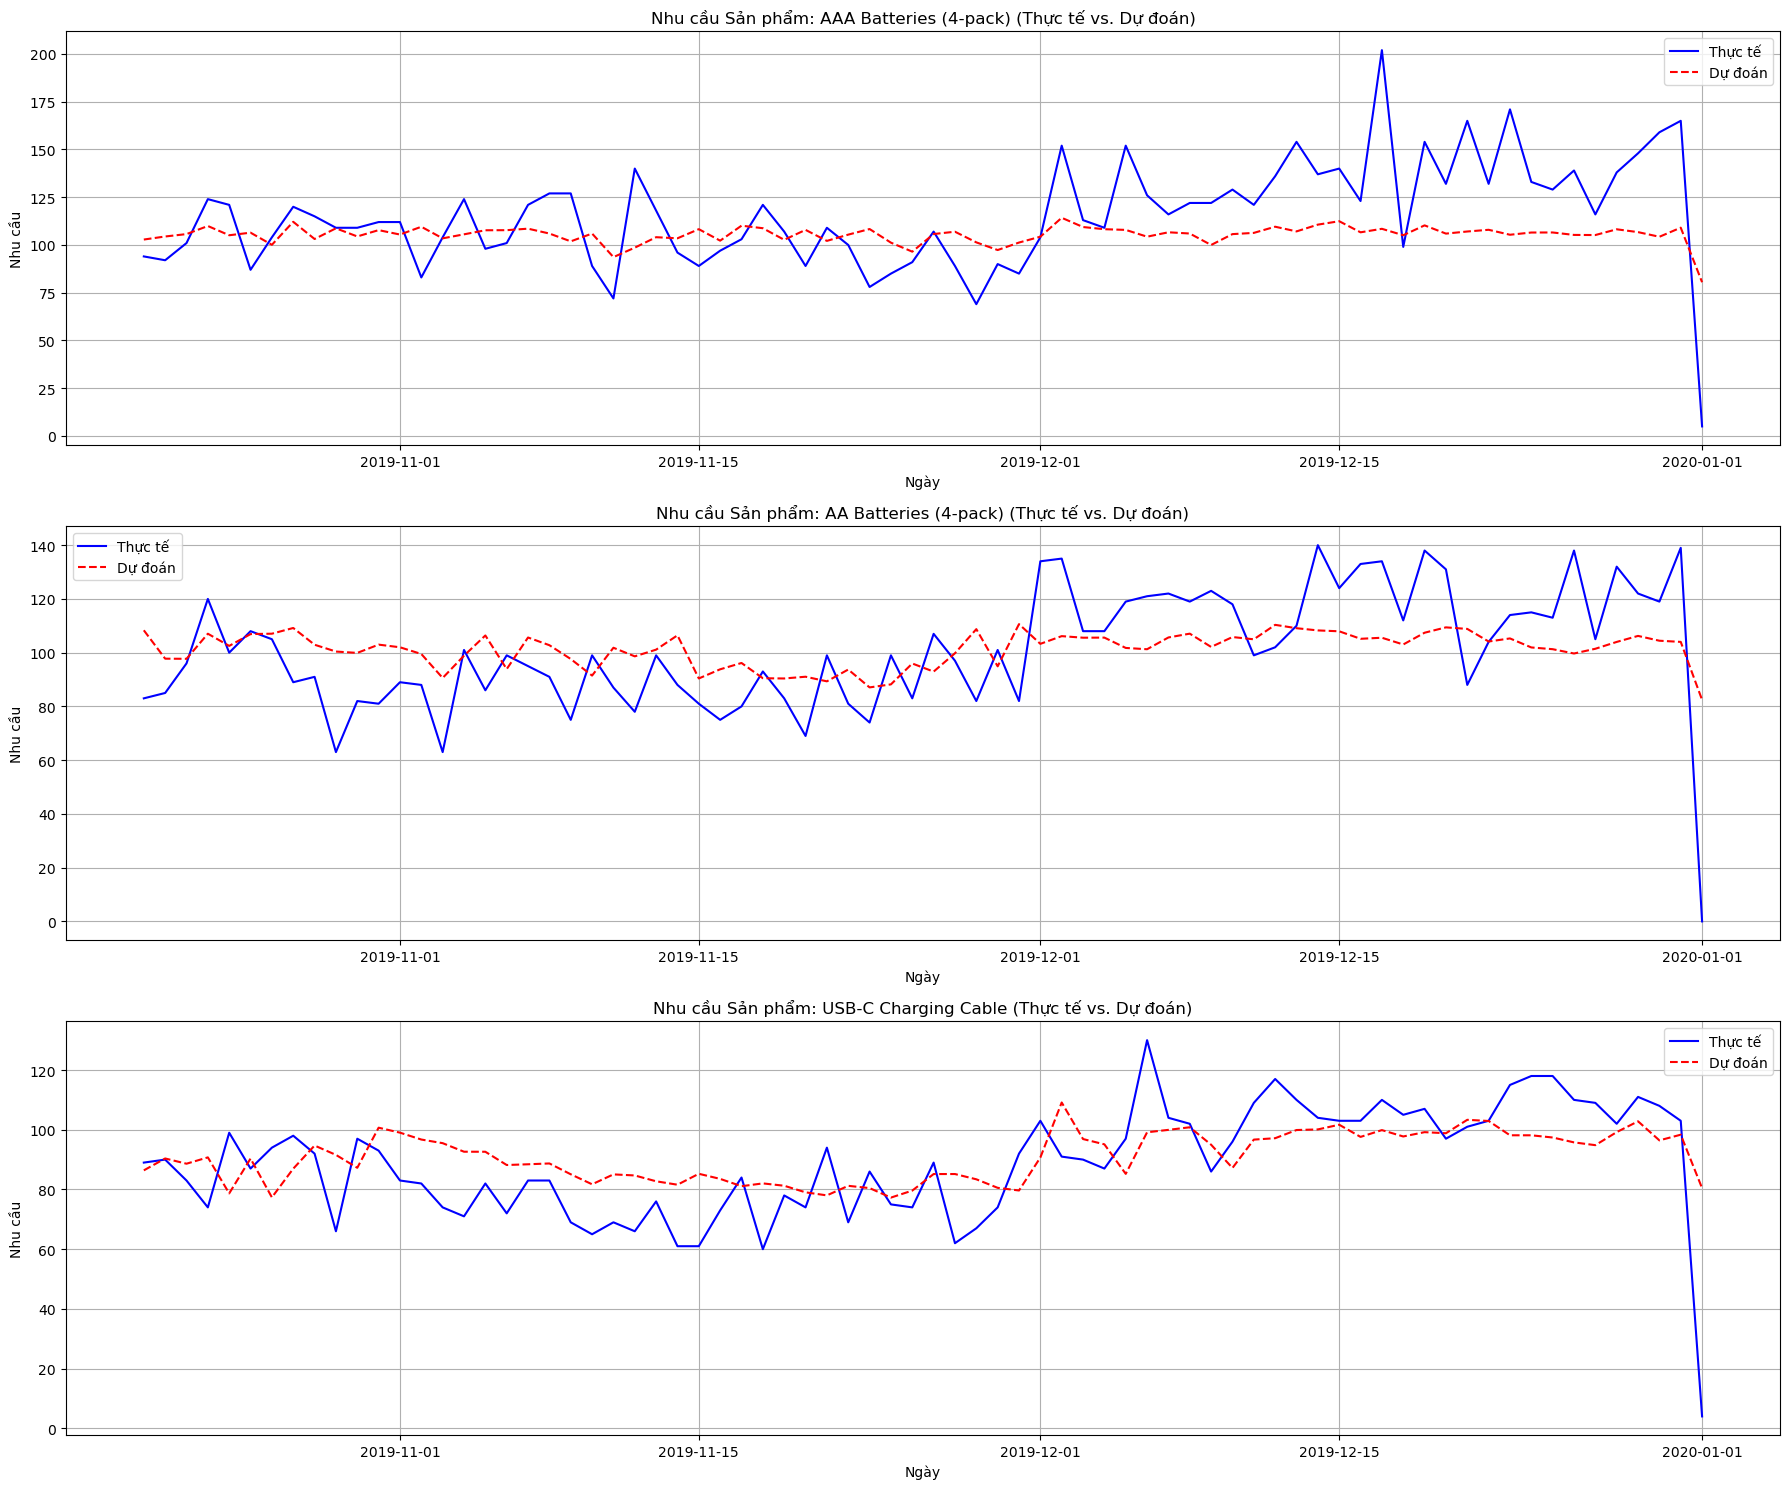

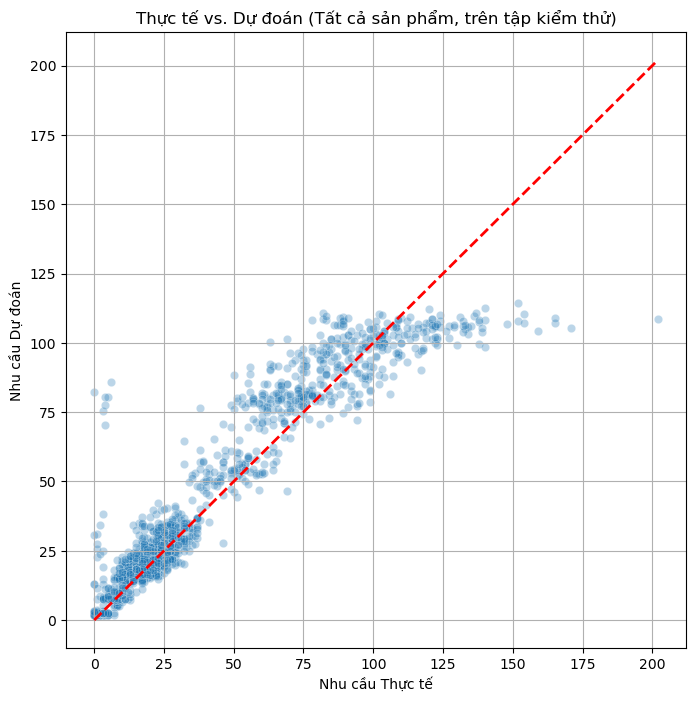

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Đảm bảo pandas được import nếu bạn chưa có

# Tạo một DataFrame chứa kết quả dự đoán và thực tế
results_df = pd.DataFrame({
    'Date': test_df['Date'],
    'Product': test_df['Product'],
    'Actual Demand': y_test,
    'Predicted Demand': y_pred
})

# Sắp xếp theo ngày để vẽ biểu đồ chuỗi thời gian
results_df.sort_values(by=['Product', 'Date'], inplace=True)

# --- 1. Trực quan hóa nhu cầu tổng thể (tổng hợp lại từ các sản phẩm) ---
overall_results = results_df.groupby('Date')[['Actual Demand', 'Predicted Demand']].sum().reset_index()

plt.figure(figsize=(15, 7))
sns.lineplot(data=overall_results, x='Date', y='Actual Demand', label='Nhu cầu Thực tế', color='blue')
sns.lineplot(data=overall_results, x='Date', y='Predicted Demand', label='Nhu cầu Dự đoán', color='red', linestyle='--')
plt.title('Dự đoán Nhu cầu Tổng thể Hàng ngày: Thực tế vs. Dự đoán')
plt.xlabel('Ngày')
plt.ylabel('Tổng Nhu cầu')
plt.legend()
plt.grid(True)
plt.show()

# --- 2. Trực quan hóa nhu cầu của một vài sản phẩm cụ thể (để xem chi tiết hơn) ---
print("\n--- Trực quan hóa kết quả cho một vài sản phẩm cụ thể ---")
num_products_to_plot = min(3, len(results_df['Product'].unique())) # Chọn tối đa 3 sản phẩm

top_products_test = results_df.groupby('Product')['Actual Demand'].sum().nlargest(num_products_to_plot).index.tolist()


plt.figure(figsize=(18, num_products_to_plot * 5)) # Tăng chiều cao để các subplot không bị chồng lấn
for i, product_name in enumerate(top_products_test):
    plt.subplot(num_products_to_plot, 1, i + 1)
    product_results = results_df[results_df['Product'] == product_name].copy()
    sns.lineplot(data=product_results, x='Date', y='Actual Demand', label='Thực tế', color='blue')
    sns.lineplot(data=product_results, x='Date', y='Predicted Demand', label='Dự đoán', color='red', linestyle='--')
    plt.title(f'Nhu cầu Sản phẩm: {product_name} (Thực tế vs. Dự đoán)')
    plt.xlabel('Ngày')
    plt.ylabel('Nhu cầu')
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

# --- 3. Biểu đồ phân tán (Scatter plot) của Actual vs. Predicted (tất cả sản phẩm) ---
# Biểu đồ này bạn đã thấy trước đó
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2) # Đường y=x
plt.title('Thực tế vs. Dự đoán (Tất cả sản phẩm, trên tập kiểm thử)')
plt.xlabel('Nhu cầu Thực tế')
plt.ylabel('Nhu cầu Dự đoán')
plt.grid(True)
plt.show()

In [45]:
# Sắp xếp theo sản phẩm và ngày để dễ nhìn
results_df.sort_values(by=['Product', 'Date'], inplace=True)

print("--- 10 dòng đầu tiên của bảng so sánh Nhu cầu Thực tế và Nhu cầu Dự đoán ---")
print(results_df.head(10))

print("\n--- 10 dòng cuối cùng của bảng so sánh Nhu cầu Thực tế và Nhu cầu Dự đoán ---")
print(results_df.tail(10))

--- 10 dòng đầu tiên của bảng so sánh Nhu cầu Thực tế và Nhu cầu Dự đoán ---
          Date       Product  Actual Demand  Predicted Demand
292 2019-10-20  20in Monitor           20.0         15.192256
293 2019-10-21  20in Monitor           17.0         14.749780
294 2019-10-22  20in Monitor           13.0         15.630748
295 2019-10-23  20in Monitor           14.0         16.080912
296 2019-10-24  20in Monitor            8.0         15.103218
297 2019-10-25  20in Monitor           10.0         15.994655
298 2019-10-26  20in Monitor           15.0         15.279809
299 2019-10-27  20in Monitor           18.0         16.264288
300 2019-10-28  20in Monitor           11.0         15.134120
301 2019-10-29  20in Monitor           13.0         14.733585

--- 10 dòng cuối cùng của bảng so sánh Nhu cầu Thực tế và Nhu cầu Dự đoán ---
           Date Product  Actual Demand  Predicted Demand
6944 2019-12-23  iPhone           32.0         34.107930
6945 2019-12-24  iPhone           32.0         3

In [46]:
num_zeros_in_y_test = (y_test == 0).sum()
print(f"Số lượng giá trị 0 trong y_test (nhu cầu thực tế): {num_zeros_in_y_test}")
print(f"Tỷ lệ giá trị 0 trong y_test: {num_zeros_in_y_test / len(y_test) * 100:.2f}%")

Số lượng giá trị 0 trong y_test (nhu cầu thực tế): 21
Tỷ lệ giá trị 0 trong y_test: 1.49%


In [47]:
min_non_zero_demand = y_test[y_test > 0].min()
print(f"Giá trị nhu cầu thực tế nhỏ nhất (không phải 0) trong y_test: {min_non_zero_demand}")

Giá trị nhu cầu thực tế nhỏ nhất (không phải 0) trong y_test: 1.0


In [48]:
import lightgbm as lgb
import pandas as pd
features = [
    'Year', 'Month', 'Day', 'DayOfWeek', 'DayOfYear', 'WeekOfYear', 'Quarter', 'Is_Weekend',
    'Demand_Lag_1', 'Demand_Lag_7', 'Demand_Lag_30',
    'Demand_Rolling_Mean_7', 'Demand_Rolling_Mean_30',
    'Demand_Rolling_Std_7', 'Demand_Rolling_Std_30',
    'Product_Encoded' # Đặc trưng sản phẩm đã mã hóa
]
target = 'Daily Demand'

X_full = final_demand_df[features]
y_full = final_demand_df[target]

# Khởi tạo và huấn luyện lại mô hình LightGBM trên TOÀN BỘ dữ liệu lịch sử
print("Đang huấn luyện lại mô hình LightGBM trên TOÀN BỘ dữ liệu lịch sử (01/2019 - 12/2019)...")
final_model = lgb.LGBMRegressor(random_state=42)
final_model.fit(X_full, y_full)
print("Huấn luyện lại mô hình hoàn tất")

# Hiển thị tất cả các tham số của mô hình sau khi huấn luyện
params = final_model.get_params()
for key, value in params.items():
    print(f"{key}: {value}")

Đang huấn luyện lại mô hình LightGBM trên TOÀN BỘ dữ liệu lịch sử (01/2019 - 12/2019)...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001110 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1798
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 15
[LightGBM] [Info] Start training from score 30.027610
Huấn luyện lại mô hình hoàn tất
boosting_type: gbdt
class_weight: None
colsample_bytree: 1.0
importance_type: split
learning_rate: 0.1
max_depth: -1
min_child_samples: 20
min_child_weight: 0.001
min_split_gain: 0.0
n_estimators: 100
n_jobs: None
num_leaves: 31
objective: None
random_state: 42
reg_alpha: 0.0
reg_lambda: 0.0
subsample: 1.0
subsample_for_bin: 200000
subsample_freq: 0


Xác định lại các đặc trưng (X) và biến mục tiêu (y) cho TOÀN BỘ dữ liệu
Loại bỏ cột 'Date' và 'Product' khỏi đặc trưng, vì chúng không phải là input trực tiếp cho mô hình LightGBM

In [50]:
# Lấy ngày cuối cùng của dữ liệu lịch sử của bạn
last_historical_date = final_demand_df['Date'].max()
print(f"\nNgày cuối cùng của dữ liệu lịch sử: {last_historical_date.date()}")

# Xác định phạm vi ngày cho tháng tới (tháng 01/2020)
start_forecast_date = last_historical_date + pd.Timedelta(days=1)
# Để dự đoán cho toàn bộ tháng 01/2020, chúng ta cần tìm ngày cuối cùng của tháng 01/2020
from dateutil.relativedelta import relativedelta
end_forecast_date = (start_forecast_date + relativedelta(months=1)) - pd.Timedelta(days=1)

print(f"Phạm vi dự đoán: từ {start_forecast_date.date()} đến {end_forecast_date.date()}")

# Lấy danh sách tất cả các sản phẩm duy nhất
all_products = final_demand_df['Product'].unique()
le = final_demand_df[['Product', 'Product_Encoded']].drop_duplicates() # Lấy lại encoder
product_encoder_map = dict(zip(le['Product'], le['Product_Encoded']))

# Tạo một DataFrame trống với tất cả các kết hợp Date và Product cho tháng 01/2020
forecast_dates = pd.date_range(start=start_forecast_date, end=end_forecast_date, freq='D')
from itertools import product
future_data_index = pd.MultiIndex.from_product([forecast_dates, all_products], names=['Date', 'Product'])
future_df = pd.DataFrame(index=future_data_index).reset_index()

# Thêm cột Product_Encoded cho dữ liệu tương lai
future_df['Product_Encoded'] = future_df['Product'].map(product_encoder_map)

# Tạo các đặc trưng thời gian cho dữ liệu tương lai
future_df['Year'] = future_df['Date'].dt.year
future_df['Month'] = future_df['Date'].dt.month
future_df['Day'] = future_df['Date'].dt.day
future_df['DayOfWeek'] = future_df['Date'].dt.dayofweek
future_df['DayOfYear'] = future_df['Date'].dt.dayofyear
future_df['WeekOfYear'] = future_df['Date'].dt.isocalendar().week.astype(int)
future_df['Quarter'] = future_df['Date'].dt.quarter
future_df['Is_Weekend'] = future_df['DayOfWeek'].isin([5, 6]).astype(int)

# Sắp xếp để chuẩn bị cho việc tạo lag/rolling features
future_df.sort_values(by=['Product', 'Date'], inplace=True)

print("\n5 dòng đầu tiên của DataFrame dữ liệu tương lai:")
print(future_df.head())


Ngày cuối cùng của dữ liệu lịch sử: 2020-01-01
Phạm vi dự đoán: từ 2020-01-02 đến 2020-02-01

5 dòng đầu tiên của DataFrame dữ liệu tương lai:
         Date       Product  Product_Encoded  Year  Month  Day  DayOfWeek  \
0  2020-01-02  20in Monitor                0  2020      1    2          3   
19 2020-01-03  20in Monitor                0  2020      1    3          4   
38 2020-01-04  20in Monitor                0  2020      1    4          5   
57 2020-01-05  20in Monitor                0  2020      1    5          6   
76 2020-01-06  20in Monitor                0  2020      1    6          0   

    DayOfYear  WeekOfYear  Quarter  Is_Weekend  
0           2           1        1           0  
19          3           1        1           0  
38          4           1        1           1  
57          5           1        1           1  
76          6           2        1           0  


In [51]:
# Kết hợp dữ liệu lịch sử với dữ liệu tương lai để tính toán lag/rolling features một cách liền mạch
# Chỉ lấy các cột cần thiết để tiết kiệm bộ nhớ và tránh lỗi
cols_for_lag = ['Date', 'Product', 'Daily Demand']
full_data_for_lag = pd.concat([final_demand_df[cols_for_lag], future_df[['Date', 'Product']]], ignore_index=True)

# Sắp xếp lại đảm bảo đúng thứ tự thời gian cho mỗi sản phẩm
full_data_for_lag.sort_values(by=['Product', 'Date'], inplace=True)

# Tính toán các đặc trưng trễ (lag features) và trung bình động trên tập dữ liệu đã nối
# Lưu ý: Các giá trị Daily Demand cho tương lai vẫn đang là NaN, sẽ được fillna sau khi tính lag/rolling
full_data_for_lag['Daily Demand'].fillna(0, inplace=True) # Tạm thời điền 0 cho Daily Demand trong tương lai

# Tạo đặc trưng trễ (lagged features)
full_data_for_lag['Demand_Lag_1'] = full_data_for_lag.groupby('Product')['Daily Demand'].shift(1)
full_data_for_lag['Demand_Lag_7'] = full_data_for_lag.groupby('Product')['Daily Demand'].shift(7)
full_data_for_lag['Demand_Lag_30'] = full_data_for_lag.groupby('Product')['Daily Demand'].shift(30)

# Tạo đặc trưng trung bình động (Rolling Mean)
# Sử dụng 'min_periods=1' để cho phép tính toán ngay cả khi không đủ số lượng cửa sổ ban đầu
full_data_for_lag['Demand_Rolling_Mean_7'] = full_data_for_lag.groupby('Product')['Daily Demand'].transform(lambda x: x.rolling(window=7, min_periods=1).mean().shift(1))
full_data_for_lag['Demand_Rolling_Mean_30'] = full_data_for_lag.groupby('Product')['Daily Demand'].transform(lambda x: x.rolling(window=30, min_periods=1).mean().shift(1))

# Tương tự cho Rolling Std
full_data_for_lag['Demand_Rolling_Std_7'] = full_data_for_lag.groupby('Product')['Daily Demand'].transform(lambda x: x.rolling(window=7, min_periods=1).std().shift(1))
full_data_for_lag['Demand_Rolling_Std_30'] = full_data_for_lag.groupby('Product')['Daily Demand'].transform(lambda x: x.rolling(window=30, min_periods=1).std().shift(1))

# Lấy lại chỉ những dòng thuộc về tương lai
future_features_df = full_data_for_lag[full_data_for_lag['Date'].isin(forecast_dates)].copy()

# Ghép các đặc trưng lag/rolling vào future_df ban đầu
future_df = pd.merge(future_df, future_features_df[[
    'Date', 'Product', 'Demand_Lag_1', 'Demand_Lag_7', 'Demand_Lag_30',
    'Demand_Rolling_Mean_7', 'Demand_Rolling_Mean_30',
    'Demand_Rolling_Std_7', 'Demand_Rolling_Std_30'
]], on=['Date', 'Product'], how='left')

# Xử lý NaN sau khi tạo các đặc trưng lag/rolling (chủ yếu cho những ngày đầu tiên của dự báo)
# Các giá trị này sẽ là NaN nếu không có đủ dữ liệu lịch sử để tính toán (ví dụ: demand_lag_30 cho ngày đầu tiên)
future_df.fillna(0, inplace=True) # Thường điền 0 cho các giá trị này

print("\n5 dòng đầu tiên của DataFrame dữ liệu tương lai với đầy đủ đặc trưng:")
print(future_df.head())


5 dòng đầu tiên của DataFrame dữ liệu tương lai với đầy đủ đặc trưng:
        Date       Product  Product_Encoded  Year  Month  Day  DayOfWeek  \
0 2020-01-02  20in Monitor                0  2020      1    2          3   
1 2020-01-03  20in Monitor                0  2020      1    3          4   
2 2020-01-04  20in Monitor                0  2020      1    4          5   
3 2020-01-05  20in Monitor                0  2020      1    5          6   
4 2020-01-06  20in Monitor                0  2020      1    6          0   

   DayOfYear  WeekOfYear  Quarter  Is_Weekend  Demand_Lag_1  Demand_Lag_7  \
0          2           1        1           0           3.0          13.0   
1          3           1        1           0           0.0          20.0   
2          4           1        1           1           0.0          24.0   
3          5           1        1           1           0.0          22.0   
4          6           2        1           0           0.0          20.0   

   Demand

In [52]:
# Xác định các cột đặc trưng mà mô hình của bạn mong đợi
# Đảm bảo thứ tự các cột giống hệt như X_full đã dùng để huấn luyện model
predict_features = [
    'Year', 'Month', 'Day', 'DayOfWeek', 'DayOfYear', 'WeekOfYear', 'Quarter', 'Is_Weekend',
    'Demand_Lag_1', 'Demand_Lag_7', 'Demand_Lag_30',
    'Demand_Rolling_Mean_7', 'Demand_Rolling_Mean_30',
    'Demand_Rolling_Std_7', 'Demand_Rolling_Std_30',
    'Product_Encoded'
]

# Tạo X_future từ future_df
X_future = future_df[predict_features]

print("\nĐang thực hiện dự đoán nhu cầu cho tháng 01/2020...")
# Thực hiện dự đoán
future_predictions = final_model.predict(X_future)

# Đảm bảo các giá trị dự đoán không âm
future_predictions[future_predictions < 0] = 0

# Thêm kết quả dự đoán vào future_df
future_df['Predicted Demand'] = future_predictions

print("Dự đoán hoàn tất.")

print("\n--- 10 dòng đầu tiên của kết quả dự đoán nhu cầu tháng 01/2020 ---")
print(future_df[['Date', 'Product', 'Predicted Demand']].head(10))

print("\n--- 10 dòng cuối cùng của kết quả dự đoán nhu cầu tháng 01/2020 ---")
print(future_df[['Date', 'Product', 'Predicted Demand']].tail(10))

# (Tùy chọn) Lưu kết quả dự đoán vào file CSV
# future_df[['Date', 'Product', 'Predicted Demand']].to_csv('predicted_demand_jan_2020.csv', index=False)
# print("\nĐã lưu kết quả dự đoán vào file 'predicted_demand_jan_2020.csv'")


Đang thực hiện dự đoán nhu cầu cho tháng 01/2020...
Dự đoán hoàn tất.

--- 10 dòng đầu tiên của kết quả dự đoán nhu cầu tháng 01/2020 ---
        Date       Product  Predicted Demand
0 2020-01-02  20in Monitor         13.053109
1 2020-01-03  20in Monitor         13.297369
2 2020-01-04  20in Monitor         15.673643
3 2020-01-05  20in Monitor         13.719000
4 2020-01-06  20in Monitor         13.517887
5 2020-01-07  20in Monitor         14.049598
6 2020-01-08  20in Monitor         16.039478
7 2020-01-09  20in Monitor         23.284475
8 2020-01-10  20in Monitor         23.696853
9 2020-01-11  20in Monitor         23.524391

--- 10 dòng cuối cùng của kết quả dự đoán nhu cầu tháng 01/2020 ---
          Date Product  Predicted Demand
579 2020-01-23  iPhone         15.213971
580 2020-01-24  iPhone         14.277589
581 2020-01-25  iPhone         14.430069
582 2020-01-26  iPhone         14.750744
583 2020-01-27  iPhone         12.878570
584 2020-01-28  iPhone         13.334258
585 2020-0

In [53]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, timedelta

# --- Đảm bảo các biến sau đây đã được định nghĩa từ các bước trước ---
# Bạn cần chạy lại BƯỚC TỔNG HỢP (từ câu trả lời trước) để có
# final_demand_df, final_model, product_encoder_map, historical_data_for_lag_calc, all_products.

# Lấy ngày cuối cùng của dữ liệu lịch sử
last_historical_date = final_demand_df['Date'].max()
print(f"Ngày cuối cùng của dữ liệu lịch sử: {last_historical_date.date()}")

# Xác định phạm vi ngày cho TOÀN BỘ năm tiếp theo (2020)
start_forecast_date = last_historical_date + pd.Timedelta(days=1)
# Để dự đoán cho toàn bộ năm 2020, chúng ta sẽ đặt ngày kết thúc là 31/12/2020
end_forecast_date = pd.to_datetime('2020-12-31')

print(f"Phạm vi dự đoán: từ {start_forecast_date.date()} đến {end_forecast_date.date()}")

# Lấy danh sách tất cả các sản phẩm duy nhất
all_products = final_demand_df['Product'].unique()

# Tạo một DataFrame cho tất cả các kết hợp Date và Product trong năm 2020
forecast_dates = pd.date_range(start=start_forecast_date, end=end_forecast_date, freq='D')
from itertools import product
future_data_index = pd.MultiIndex.from_product([forecast_dates, all_products], names=['Date', 'Product'])
future_df = pd.DataFrame(index=future_data_index).reset_index()

# Thêm cột Product_Encoded cho dữ liệu tương lai
future_df['Product_Encoded'] = future_df['Product'].map(product_encoder_map)

# Tạo các đặc trưng thời gian cho dữ liệu tương lai
future_df['Year'] = future_df['Date'].dt.year
future_df['Month'] = future_df['Date'].dt.month
future_df['Day'] = future_df['Date'].dt.day
future_df['DayOfWeek'] = future_df['Date'].dt.dayofweek
future_df['DayOfYear'] = future_df['Date'].dt.dayofyear
# Sửa lỗi ở đây: current_date.dt.isocalendar().week đã là int rồi
future_df['WeekOfYear'] = future_df['Date'].dt.isocalendar().week # Đã bỏ .astype(int)
future_df['Quarter'] = future_df['Date'].dt.quarter
future_df['Is_Weekend'] = future_df['DayOfWeek'].isin([5, 6]).astype(int)

# Khởi tạo cột 'Daily Demand' trong future_df với NaN, cột này sẽ được điền bằng dự đoán
future_df['Daily Demand'] = np.nan

# Sắp xếp future_df
future_df.sort_values(by=['Product', 'Date'], inplace=True)

print("\n5 dòng đầu tiên của DataFrame dữ liệu tương lai (chỉ có các đặc trưng thời gian và sản phẩm):")
print(future_df.head())

# --- BẮT ĐẦU QUÁ TRÌNH DỰ BÁO ĐỆ QUY (Thay thế Bước 18) ---
# Kết hợp dữ liệu lịch sử và dữ liệu tương lai rỗng vào một DataFrame để thực hiện dự báo đệ quy.
# Cột 'Daily Demand' của future_df sẽ được điền dần bằng các dự đoán.
historical_and_future_df = pd.concat([
    final_demand_df[['Date', 'Product', 'Daily Demand', 'Product_Encoded',
                     'Year', 'Month', 'Day', 'DayOfWeek', 'DayOfYear',
                     'WeekOfYear', 'Quarter', 'Is_Weekend']].copy(), # Copy để tránh SettingWithCopyWarning
    future_df[['Date', 'Product', 'Daily Demand', 'Product_Encoded',
               'Year', 'Month', 'Day', 'DayOfWeek', 'DayOfYear',
               'WeekOfYear', 'Quarter', 'Is_Weekend']].copy() # Copy để tránh SettingWithCopyWarning
], ignore_index=True)

# Sắp xếp theo sản phẩm và ngày
historical_and_future_df.sort_values(by=['Product', 'Date'], inplace=True)

print("\nBắt đầu quá trình dự đoán đệ quy cho năm 2020...")

# Định nghĩa các đặc trưng mà mô hình mong đợi (đã có từ Bước 16)
predict_features = [
    'Year', 'Month', 'Day', 'DayOfWeek', 'DayOfYear', 'WeekOfYear', 'Quarter', 'Is_Weekend',
    'Demand_Lag_1', 'Demand_Lag_7', 'Demand_Lag_30',
    'Demand_Rolling_Mean_7', 'Demand_Rolling_Mean_30',
    'Demand_Rolling_Std_7', 'Demand_Rolling_Std_30',
    'Product_Encoded'
]


# Lặp qua từng ngày trong phạm vi dự báo
for current_date in forecast_dates:
    # DataFrame để thu thập các đặc trưng đã tính toán cho ngày hiện tại của TẤT CẢ sản phẩm
    X_current_day_features = pd.DataFrame(columns=predict_features)

    # Lặp qua từng sản phẩm để tính toán đặc trưng và dự đoán cho ngày hiện tại
    for product_name in all_products:
        product_encoded = product_encoder_map.get(product_name)
        if product_encoded is None:
            continue

        # Lấy dữ liệu lịch sử VÀ các dự đoán đã thực hiện cho sản phẩm này cho đến ngày *trước* ngày hiện tại
        product_data_for_features = historical_and_future_df[
            (historical_and_future_df['Product'] == product_name) &
            (historical_and_future_df['Date'] < current_date)
        ].sort_values(by='Date').copy()

        # Khởi tạo các đặc trưng cho hàng hiện tại
        current_features = {
            'Year': current_date.year,
            'Month': current_date.month,
            'Day': current_date.day,
            'DayOfWeek': current_date.dayofweek,
            'DayOfYear': current_date.dayofyear,
            # Sửa lỗi ở đây: current_date.isocalendar().week đã là int rồi
            'WeekOfYear': current_date.isocalendar().week, # Đã bỏ .astype(int)
            'Quarter': current_date.quarter,
            'Is_Weekend': int(current_date.dayofweek in [5, 6]),
            'Product_Encoded': product_encoded
        }

        # Tính toán các đặc trưng lag và rolling mean/std DỰA TRÊN DỮ LIỆU CŨ HƠN
        if not product_data_for_features.empty:
            # Lags
            current_features['Demand_Lag_1'] = product_data_for_features['Daily Demand'].iloc[-1] if len(product_data_for_features) >= 1 else 0
            current_features['Demand_Lag_7'] = product_data_for_features['Daily Demand'].iloc[-7] if len(product_data_for_features) >= 7 else 0
            current_features['Demand_Lag_30'] = product_data_for_features['Daily Demand'].iloc[-30] if len(product_data_for_features) >= 30 else 0

            # Rolling Means (shift(1) được tích hợp bằng cách lấy giá trị cuối cùng của cửa sổ kết thúc trước ngày hiện tại)
            current_features['Demand_Rolling_Mean_7'] = product_data_for_features['Daily Demand'].rolling(window=7, min_periods=1).mean().iloc[-1] if len(product_data_for_features) >= 1 else 0
            current_features['Demand_Rolling_Mean_30'] = product_data_for_features['Daily Demand'].rolling(window=30, min_periods=1).mean().iloc[-1] if len(product_data_for_features) >= 1 else 0

            # Rolling Stds
            current_features['Demand_Rolling_Std_7'] = product_data_for_features['Daily Demand'].rolling(window=7, min_periods=1).std().iloc[-1] if len(product_data_for_features) >= 1 else 0
            current_features['Demand_Rolling_Std_30'] = product_data_for_features['Daily Demand'].rolling(window=30, min_periods=1).std().iloc[-1] if len(product_data_for_features) >= 1 else 0

            # Xử lý trường hợp std là NaN nếu cửa sổ chỉ có 1 giá trị hoặc tất cả giá trị giống nhau
            if pd.isna(current_features['Demand_Rolling_Std_7']): current_features['Demand_Rolling_Std_7'] = 0
            if pd.isna(current_features['Demand_Rolling_Std_30']): current_features['Demand_Rolling_Std_30'] = 0

        else: # Nếu không có đủ dữ liệu lịch sử cho sản phẩm này (ví dụ: sản phẩm mới xuất hiện)
            current_features['Demand_Lag_1'] = 0
            current_features['Demand_Lag_7'] = 0
            current_features['Demand_Lag_30'] = 0
            current_features['Demand_Rolling_Mean_7'] = 0
            current_features['Demand_Rolling_Mean_30'] = 0
            current_features['Demand_Rolling_Std_7'] = 0
            current_features['Demand_Rolling_Std_30'] = 0

        # Thêm hàng đặc trưng đã tính toán vào DataFrame X_current_day_features
        X_current_day_features = pd.concat([X_current_day_features, pd.DataFrame([current_features])], ignore_index=True)


    # Đảm bảo thứ tự cột cho X_current_day_features đúng như predict_features
    # Điền 0 cho bất kỳ NaN nào còn sót lại (ví dụ: nếu có sản phẩm mới không có lịch sử)
    X_current_day_features = X_current_day_features[predict_features].fillna(0)

    # Thực hiện dự đoán cho tất cả sản phẩm của ngày hiện tại
    if not X_current_day_features.empty:
        daily_predictions = final_model.predict(X_current_day_features)
        daily_predictions[daily_predictions < 0] = 0 # Đảm bảo giá trị dự đoán không âm

        # Cập nhật cột 'Daily Demand' trong historical_and_future_df với các dự đoán mới
        # Điều này cho phép các dự đoán này được sử dụng làm đầu vào cho các ngày tiếp theo trong vòng lặp đệ quy
        for i, product_name in enumerate(all_products):
            historical_and_future_df.loc[
                (historical_and_future_df['Date'] == current_date) &
                (historical_and_future_df['Product'] == product_name),
                'Daily Demand'
            ] = daily_predictions[i]

    # (Tùy chọn) In tiến độ để biết quá trình đang diễn ra
    if current_date.day == 1 or current_date == forecast_dates[-1]: # In vào đầu mỗi tháng hoặc cuối cùng
        print(f"  Đã xử lý đến {current_date.strftime('%Y-%m-%d')}")

# Lọc ra chỉ những dòng thuộc về phạm vi dự đoán (năm 2020)
future_predictions_df = historical_and_future_df[historical_and_future_df['Date'] >= start_forecast_date].copy()

# --- Hiển thị và lưu kết quả (Tương tự Bước 19) ---
print("\n--- 10 dòng đầu tiên của kết quả dự đoán nhu cầu năm 2020 ---")
print(future_predictions_df[['Date', 'Product', 'Daily Demand']].head(10))

print("\n--- 10 dòng cuối cùng của kết quả dự đoán nhu cầu năm 2020 ---")
print(future_predictions_df[['Date', 'Product', 'Daily Demand']].tail(10))

# (Tùy chọn) Lưu kết quả dự đoán vào file CSV
# future_predictions_df[['Date', 'Product', 'Daily Demand']].to_csv('predicted_demand_2020_full_year.csv', index=False)
# print("\nĐã lưu kết quả dự đoán vào file 'predicted_demand_2020_full_year.csv'")

# Tính tổng nhu cầu cho cả năm 2020
total_predicted_demand_2020 = future_predictions_df['Daily Demand'].sum()
print(f"\nTổng nhu cầu dự đoán cho năm 2020: {total_predicted_demand_2020:.2f}")

Ngày cuối cùng của dữ liệu lịch sử: 2020-01-01
Phạm vi dự đoán: từ 2020-01-02 đến 2020-12-31

5 dòng đầu tiên của DataFrame dữ liệu tương lai (chỉ có các đặc trưng thời gian và sản phẩm):
         Date       Product  Product_Encoded  Year  Month  Day  DayOfWeek  \
0  2020-01-02  20in Monitor                0  2020      1    2          3   
19 2020-01-03  20in Monitor                0  2020      1    3          4   
38 2020-01-04  20in Monitor                0  2020      1    4          5   
57 2020-01-05  20in Monitor                0  2020      1    5          6   
76 2020-01-06  20in Monitor                0  2020      1    6          0   

    DayOfYear  WeekOfYear  Quarter  Is_Weekend  Daily Demand  
0           2           1        1           0           NaN  
19          3           1        1           0           NaN  
38          4           1        1           1           NaN  
57          5           1        1           1           NaN  
76          6           2        1


Đang tạo biểu đồ so sánh nhu cầu năm 2019 và 2020...


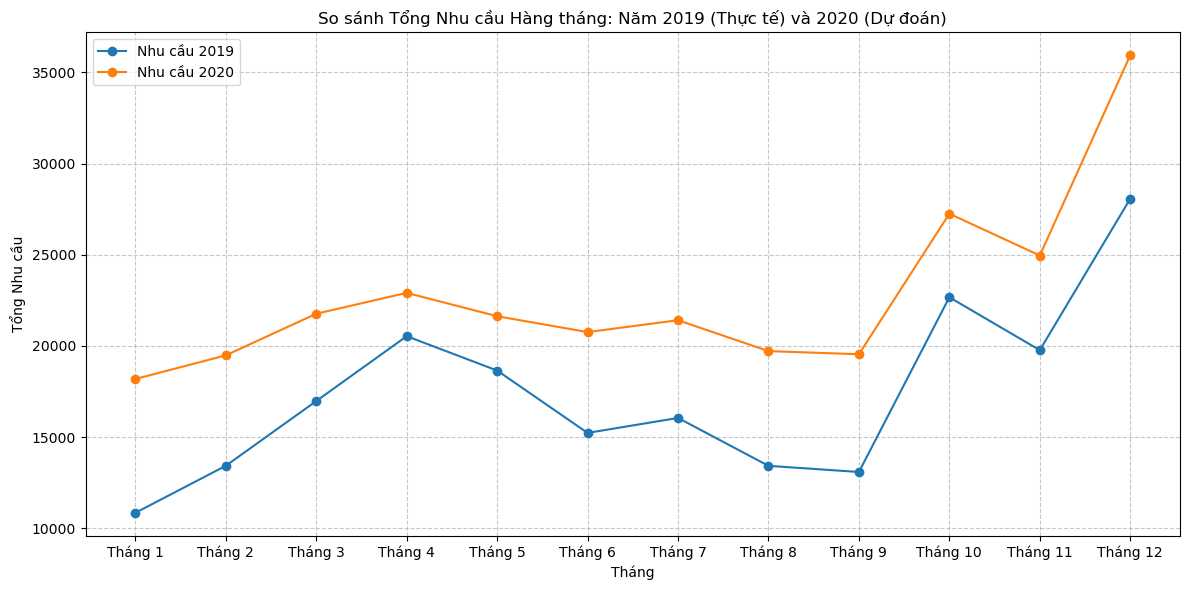


Biểu đồ so sánh năm 2019 và 2020 đã được tạo.


In [54]:
# --- Tạo biểu đồ so sánh năm 2019 và 2020 ---

demand_2019 = final_demand_df[final_demand_df['Year'] == 2019].copy()
monthly_demand_2019 = demand_2019.groupby('Month')['Daily Demand'].sum().reset_index()
monthly_demand_2019.rename(columns={'Daily Demand': 'Total Demand'}, inplace=True)
monthly_demand_2019['Year'] = 2019

demand_2020 = future_predictions_df[future_predictions_df['Year'] == 2020].copy()
monthly_demand_2020 = demand_2020.groupby('Month')['Daily Demand'].sum().reset_index()
monthly_demand_2020.rename(columns={'Daily Demand': 'Total Demand'}, inplace=True)
monthly_demand_2020['Year'] = 2020

combined_monthly_demand = pd.concat([monthly_demand_2019, monthly_demand_2020])

plt.figure(figsize=(12, 6))
for year in combined_monthly_demand['Year'].unique():
    subset = combined_monthly_demand[combined_monthly_demand['Year'] == year]
    plt.plot(subset['Month'], subset['Total Demand'], marker='o', label=f'Nhu cầu {year}')

plt.title('So sánh Tổng Nhu cầu Hàng tháng: Năm 2019 (Thực tế) và 2020 (Dự đoán)')
plt.xlabel('Tháng')
plt.ylabel('Tổng Nhu cầu')
plt.xticks(range(1, 13), ['Tháng 1', 'Tháng 2', 'Tháng 3', 'Tháng 4', 'Tháng 5', 'Tháng 6',
                           'Tháng 7', 'Tháng 8', 'Tháng 9', 'Tháng 10', 'Tháng 11', 'Tháng 12'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

print("\nBiểu đồ so sánh năm 2019 và 2020:")

In [55]:
# Bỏ cột ID nếu bạn tự thêm vào Pandas, vì MySQL sẽ tự tạo ID
df_to_export = df_sale[['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']]

# Xuất ra file CSV (không bao gồm index)
df_to_export.to_csv('sales_data_for_mysql.csv', index=False, encoding='utf-8') 

print("Đã xuất dữ liệu ra file sales_data_for_mysql1.csv")

Đã xuất dữ liệu ra file sales_data_for_mysql1.csv


In [56]:
import joblib

# Sử dụng đúng tên biến 'final_model'
joblib.dump(final_model, 'lightgbm_sales_model.joblib')

print("Đã lưu 'final_model' thành công vào file 'lightgbm_sales_model.joblib'")

Đã lưu 'final_model' thành công vào file 'lightgbm_sales_model.joblib'


In [1]:
git remote add origin https://github.com/NgVanh03/LightGBM_DataPrediction.git

SyntaxError: invalid syntax (1674153959.py, line 1)

In [3]:
echo "# LightGBM_DataPrediction" >> README.md

In [5]:
git init

SyntaxError: invalid syntax (2830201818.py, line 1)